In [21]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
from scipy import optimize
from sympy.solvers import solve
from sympy import Symbol
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('expand_frame_repr', False)

In [22]:
qa = pd.read_csv('QA_metadata_tabDelimited.txt', sep = "\t")
simplified = qa[['ProcessDataID', 'CodeName', 'cathodeMass']]
simplified = simplified.dropna()

In [23]:
def path_listing(path):
    path_files = [f for f in listdir(path) if isfile(join(path, f)) if f[:13] == "ProcessDataID"]
    for i in path_files:
        print(i)
    return path_files

In [24]:
path_list = path_listing(r'C:\Users\cjang.WILDCAT\Desktop\data_driven\CJ_work')
path_list[0]

ProcessDataID_184982_tabDelimited.txt
ProcessDataID_184985_tabDelimited.txt
ProcessDataID_184988_tabDelimited.txt
ProcessDataID_184991_tabDelimited.txt
ProcessDataID_184994_tabDelimited.txt
ProcessDataID_184997_tabDelimited.txt
ProcessDataID_185000_tabDelimited.txt
ProcessDataID_185003_tabDelimited.txt
ProcessDataID_185006_tabDelimited.txt
ProcessDataID_185009_tabDelimited.txt
ProcessDataID_185012_tabDelimited.txt
ProcessDataID_185015_tabDelimited.txt
ProcessDataID_185018_tabDelimited.txt
ProcessDataID_185021_tabDelimited.txt
ProcessDataID_185024_tabDelimited.txt
ProcessDataID_185027_tabDelimited.txt


'ProcessDataID_184982_tabDelimited.txt'

In [25]:
ids = []
for i in path_list:
    up1 = i.strip('ProcessDataID_')
    no = up1.strip('_tabDelimited.txt')
    ids.append(float(no))
    print(float(no))

184982.0
184985.0
184988.0
184991.0
184994.0
184997.0
185000.0
185003.0
185006.0
185009.0
185012.0
185015.0
185018.0
185021.0
185024.0
185027.0


In [26]:
df = pd.read_csv(path_list[0], sep = "\t")
df = df[df['Step'] == "ApplyCurrent"]
df.head()

,ProcessDataID,OffsetTime_h,StepNumber,Cycle,Step,State,Flag1,Flag2,Flag3,Voltage_V,...,CycleCapacity_mAh,StateCapacity_mAh,StepCapacity_mAh,Energy_Wh,CycleEnergy_Wh,StateEnergy_Wh,StepEnergy_Wh,StepOffsetTime_h,dI_dt_mA_per_h,dQ_qV_mAh_per_V
1,184982,0.002806,1,0,ApplyCurrent,Charge,Cycle-0,0.1,Charging,1.036164,...,0.000860,0.000860,0.000860,8.907017e-07,8.907017e-07,8.907017e-07,8.907017e-07,0.002778,0,0
2,184982,0.005583,1,0,ApplyCurrent,Charge,Cycle-0,0.1,Charging,1.874889,...,0.002078,0.002078,0.002078,3.175524e-06,3.175524e-06,3.175524e-06,3.175524e-06,0.005556,0,0
3,184982,0.008361,1,0,ApplyCurrent,Charge,Cycle-0,0.1,Charging,2.190412,...,0.003397,0.003397,0.003397,6.063274e-06,6.063274e-06,6.063274e-06,6.063274e-06,0.008333,0,0
4,184982,0.011139,1,0,ApplyCurrent,Charge,Cycle-0,0.1,Charging,2.284153,...,0.004766,0.004766,0.004766,9.190301e-06,9.190301e-06,9.190301e-06,9.190301e-06,0.011111,0,0
5,184982,0.013917,1,0,ApplyCurrent,Charge,Cycle-0,0.1,Charging,2.317288,...,0.006140,0.006140,0.006140,1.237575e-05,1.237575e-05,1.237575e-05,1.237575e-05,0.013889,0,0


In [27]:
i = list(simplified['ProcessDataID'])

df['cathodeMass'] = np.ones(len(df)) * simplified.iloc[i.index(df['ProcessDataID'][1])].cathodeMass
df['divided'] = df['StateCapacity_mAh']/df['cathodeMass']
si = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]

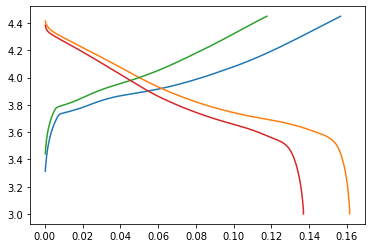

In [28]:
tenth_dis = si[(si['Cycle'] == 10) & (si['State'] == 'Discharge')]
#tenth cycle plot
tenth_charge = si[(si['Cycle'] == 10) & (si['State'] == 'Charge')]

plt.plot(tenth_charge['divided'], tenth_charge['Voltage_V'])
plt.plot(tenth_dis['divided'], tenth_dis['Voltage_V'])

si = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]
hundth_dis = si[(si['Cycle'] == 100) & (si['State'] == 'Discharge')]
#tenth cycle plot
hundth_charge = si[(si['Cycle'] == 100) & (si['State'] == 'Charge')]

plt.plot(hundth_charge['divided'], hundth_charge['Voltage_V'])
plt.plot(hundth_dis['divided'], hundth_dis['Voltage_V'])

In [16]:
(min(set(tenth_dis['Voltage_V'])), max(set(tenth_dis['Voltage_V']))), (min(set(hundth_dis['Voltage_V'])), max(set(hundth_dis['Voltage_V'])))

((3.0018439999999997, 4.413483), (3.001173, 4.3825330000000005))

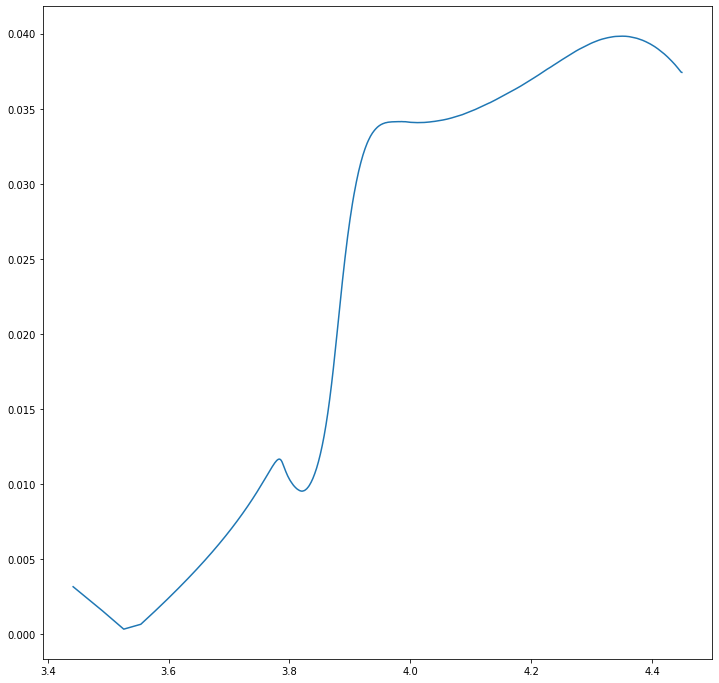

In [31]:
y_data = tenth_charge['Voltage_V']
x_data = tenth_charge['divided']
def test_func(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x**1 + f
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,p0=[0, 0, 0, 0, 0, 0])
sols = []
for i in hundth_charge['Voltage_V']:
    x = Symbol('x', real=True)
    solutions = solve(params[0]*x**5 + params[1]*x**4 + params[2]*x**3 + params[3]*x**2 + params[4]*x**1 + params[5] - i, x)
    #print(solutions[0])
    sols.append(solutions[0])
hundth_charge_preds = {'voltage': hundth_charge['Voltage_V'], 'hund mass': hundth_charge['divided'], 'tenth mass': sols}
df1 = pd.DataFrame(data = hundth_charge_preds)
df1['difference'] = abs(df1['hund mass'] - df1['tenth mass'])
plt.figure(figsize=(12,12))
plt.plot(df1['voltage'], df1['difference'])

In [32]:
print(params)

[ 1.04266965e+05 -4.77533719e+04  8.20857059e+03 -6.26605072e+02
  2.35753883e+01  3.51675002e+00]


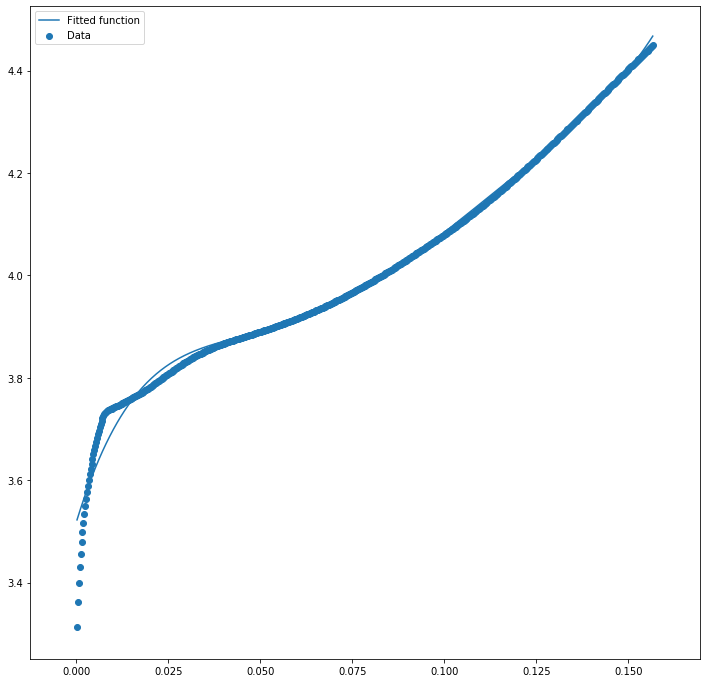

In [35]:
plt.figure(figsize=(12,12))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1], params[2], params[3], params[4], params[5]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()